In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_functions import z_NB, smooth_hist, bin_centers

In [2]:
# The selection
selection = pd.read_csv('csv/selection_first_kinda.csv')
selection_last = pd.read_csv('csv/selection.csv')

path_to_files = '/home/alberto/almacen/Selected_LAEs/First_visual_sel'

# ATT inspection
vi_att = pd.read_csv(f'{path_to_files}/inspeccion_AT.csv')
score_att = vi_att.to_numpy()[:, 1].astype(int)
# SGL inspection
vi_sgl = pd.read_csv(f'{path_to_files}/Sid_classification_noInfo_iter2.csv')
score_sgl = vi_sgl.to_numpy()[:, 1].astype(int)
# AFS inspection
vi_afs = pd.read_csv(f'{path_to_files}/class_afs.csv')
score_afs = vi_afs.to_numpy()[:, 1].astype(int)
# PAM inspection
vi_pam = pd.read_csv(f'{path_to_files}/inspection_pam.csv')
score_pam = vi_pam.to_numpy()[:, 0].astype(int)

files_list = list(vi_sgl.to_numpy()[:, 4])
src_list = [s.replace('J-NEP', 'caca') for s in files_list]
src_list = [s.replace('-', ' ') for s in src_list]
src_list = [s.replace('.', ' ') for s in src_list]
src_list = [s.split() for s in src_list]
src_list = np.array([int(s[2]) for s in src_list])

bad_NB_image = np.array([5, 19, 21, 34, 36, 38, 39, 52, 55, 139, 140, 171])
for sc in [score_att, score_sgl, score_afs, score_pam]:
    sc[bad_NB_image] = 0

selection_last.head()

,Unnamed: 0,src,tile_id,x_im,y_im,nb_sel,SDSS_spCl,SDSS_zspec,RA,DEC,...,EW_lya_err,puri,r,other_lines,color_mask,pm_mask,snr_mask,ml_mask,nice_nice,starprob
0,0,402,2406,7083.28760,648.055786,3,QSO,2.30541,215.324992,52.896109,...,3.790194,0.996701,20.573435,"[3, 14, 26]",True,True,True,True,True,1.000
1,1,533,2406,2928.11426,776.680115,5,NaN,NaN,215.025112,53.085950,...,16.038528,0.991542,22.039532,[4],True,True,True,True,True,0.965
2,2,1086,2406,2296.27686,1211.679080,1,NaN,NaN,215.009874,53.133437,...,23.085985,0.911115,21.278354,[],True,True,True,True,True,0.000
3,3,1390,2241,3470.82300,231.305771,1,QSO,1.00250,213.925689,52.368600,...,9.964047,0.000000,20.776354,[1],True,True,True,True,True,0.864
4,4,2317,2406,7369.45752,1733.409790,2,NaN,NaN,215.426167,52.931958,...,9.020907,0.597305,21.643579,[],True,True,True,True,True,0.000


In [3]:
L_Arr = np.zeros_like(src_list).astype(float)
for i, src in enumerate(src_list):
    try:
        this_L = float(selection[selection['src'] == src]['L_lya'])
    except:
        this_L = 0.
    L_Arr[i] = this_L

mag = np.zeros_like(src_list).astype(float)
for i, src in enumerate(src_list):
    try:
        this_mag = float(selection[selection['src'] == src]['r'])
    except:
        this_mag = 0.
    mag[i] = this_mag

z_Arr = np.zeros_like(src_list).astype(float)
for i, src in enumerate(src_list):
    try:
        this_z = z_NB(float(selection[selection['src'] == src]['nb_sel']))
    except:
        this_z = 0.
    z_Arr[i] = this_z

nb_Arr = np.zeros_like(src_list).astype(float)
for i, src in enumerate(src_list):
    try:
        this_nb = float(selection[selection['src'] == src]['nb_sel'])
    except:
        this_nb = 0.
    nb_Arr[i] = this_nb

EW_Arr = np.zeros_like(src_list).astype(float)
for i, src in enumerate(src_list):
    try:
        this_ew = float(selection[selection['src'] == src]['EW_lya'])
    except:
        this_ew = 0.
    EW_Arr[i] = this_ew

puri2d = np.zeros_like(src_list).astype(float)
for i, src in enumerate(src_list):
    try:
        this_puri2d = float(selection_last[selection_last['src'] == src]['puri'])
    except:
        this_puri2d = 0.
    puri2d[i] = this_puri2d

xim = np.zeros_like(src_list).astype(float)
for i, src in enumerate(src_list):
    try:
        this_xim = float(selection[selection['src'] == src]['x_im'])
    except:
        this_xim = 0.
    xim[i] = this_xim

yim = np.zeros_like(src_list).astype(float)
for i, src in enumerate(src_list):
    try:
        this_yim = float(selection[selection['src'] == src]['y_im'])
    except:
        this_yim = 0.
    yim[i] = this_yim

tile_id = np.zeros_like(src_list).astype(float)
for i, src in enumerate(src_list):
    try:
        this_tid = float(selection[selection['src'] == src]['tile_id'])
    except:
        this_tid = 0.
    tile_id[i] = this_tid

In [4]:
selection_last_src = selection_last['src'].to_numpy()
last_sel_mask = np.zeros_like(src_list).astype(bool)

for src in selection_last_src:
    if src in src_list:
        last_sel_mask[src_list == src] = True

/tmp/ipykernel_515551/2137221658.py:37: RuntimeWarning: invalid value encountered in divide
  puri_Arr = good_hist / (good_hist + bad_hist)
/tmp/ipykernel_515551/2137221658.py:38: RuntimeWarning: invalid value encountered in divide
  puri_err_Arr = (good_hist / (good_hist + bad_hist) ** 2 +
/tmp/ipykernel_515551/2137221658.py:39: RuntimeWarning: invalid value encountered in divide
  good_hist ** 2 / (good_hist + bad_hist) ** 4 * good_hist) ** 0.5


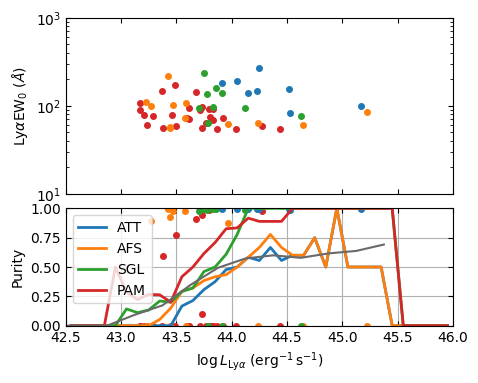

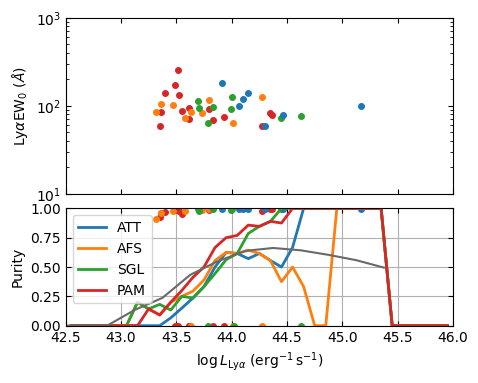

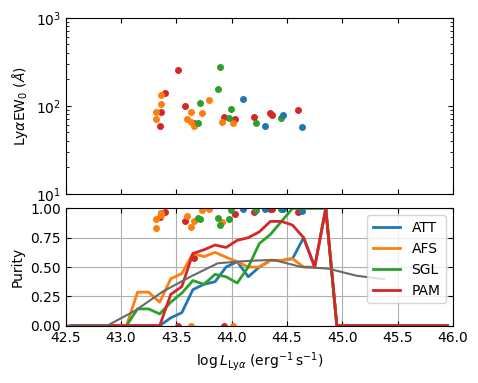

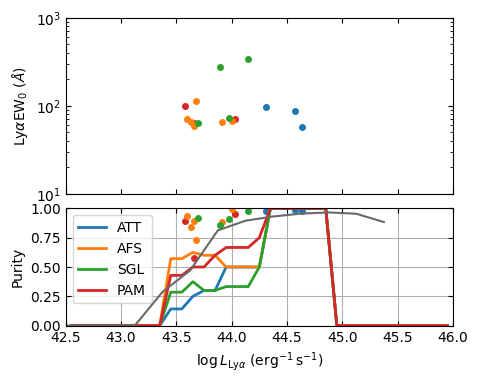

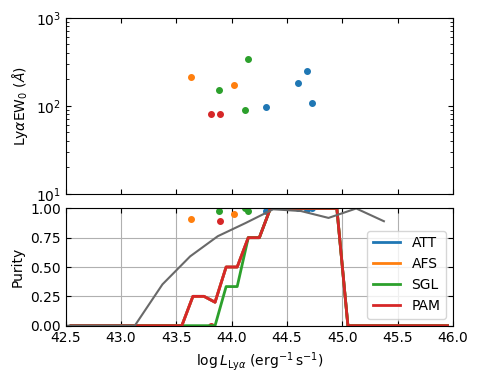

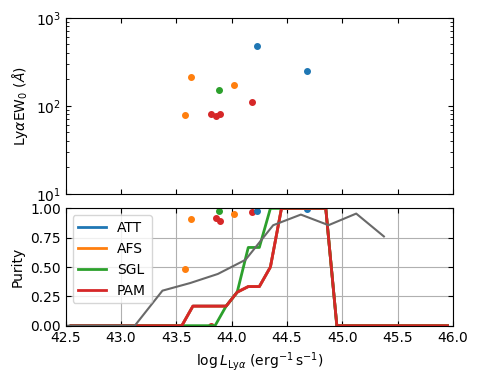

In [5]:
colors_list = ['black', 'tab:red', 'tab:red', 'tab:orange', 'tab:green', 'tab:blue']
nbs_list = [[1, 5], [4, 8], [7, 11], [10, 14], [13, 17], [16, 20]]

# score = np.mean([score_afs, score_att, score_sgl, score_pam], axis=0)
score = np.mean([score_att], axis=0)
score_list = [score_att, score_afs, score_sgl, score_pam]
score_label_list = ['ATT', 'AFS', 'SGL', 'PAM']

# score = score_afs

for jjj, [nb_min, nb_max] in enumerate(nbs_list):
    fig, (ax, axx) = plt.subplots(2, figsize=(5, 4), sharex=True,
                                  gridspec_kw=dict(height_ratios=[1.5, 1]))

    extra_mask = (
        (nb_Arr >= nb_min) & (nb_Arr <= nb_max)
        & (L_Arr > 0)
        & last_sel_mask
        & (score > 0)
    )
    bins = np.linspace(42.5, 46, 8)
    bins_c = [bins[i : i + 2].sum() * 0.5 for i in range(len(bins) - 1)]

    for iii, c in enumerate(colors_list):
        this_mask = (np.round(score) == iii) & extra_mask
        ax.plot(L_Arr[this_mask], EW_Arr[this_mask], ls='', marker='o',
                markerfacecolor=c, markeredgecolor=c, markersize=4)
        axx.plot(L_Arr[this_mask], puri2d[this_mask], color=c, markersize=4,
                 marker='o', ls='')
    
    # good_hist = np.histogram(L_Arr[(score > 3) & extra_mask], bins)[0]
    # bad_hist = np.histogram(L_Arr[(score <= 3) & (score > 0) & extra_mask], bins)[0]
    for kkk, score_i in enumerate(score_list):
        good_hist, pc = smooth_hist(L_Arr[(score_i > 3) & extra_mask], 42.5, 46, 0.1, 0.5)
        bad_hist, pc = smooth_hist(L_Arr[(score_i <= 3) & extra_mask], 42.5, 46, 0.1, 0.5)

        puri_Arr = good_hist / (good_hist + bad_hist)
        puri_err_Arr = (good_hist / (good_hist + bad_hist) ** 2 +
                        good_hist ** 2 / (good_hist + bad_hist) ** 4 * good_hist) ** 0.5
        puri_err_Arr[~np.isfinite(puri_err_Arr)] = 0
        puri_Arr[~np.isfinite(puri_Arr)] = 0.
        axx.plot(pc, puri_Arr, linewidth=2, label=score_label_list[kkk])

    # Load puri from mocks
    if jjj != 6:
        puri_mock = np.load(f'npy/puri_1d_{nb_min}-{nb_max}.npy')
        bc_mock = np.load(f'npy/puri_1d_bc.npy')
        axx.plot(bc_mock, puri_mock, ls='-', marker='', color='dimgray')
    if jjj == 6:
        puri_mock = np.load(f'tmp/comb_puri_1.0.npy')
        axx.plot(bc_mock, puri_mock, ls='-', marker='', color='dimgray')
    
    axx.grid()
    axx.set_ylim(0, 1)
    # ax.set_ylim(2e1, 1e4)
    ax.set_xlim(42.5, 46)
    ax.set_ylim(10, 1e3)
    ax.set_ylabel(r'Ly$\alpha$EW$_0$ ($\AA$)')
    axx.set_ylabel('Purity')
    axx.set_xlabel(r'$\log L_{\mathrm{Ly}\alpha}$ (erg$^{-1}\,$s$^{-1}$)')
    axx.legend()

    for axi in [ax, axx]:
        axi.tick_params(which='both', direction='in')
        axi.yaxis.set_ticks_position('both')
        axi.xaxis.set_ticks_position('both')

    ax.set_yscale('log')

    fig.subplots_adjust(hspace=0.1)
    # fig.savefig(f'/home/alberto/Desktop/pres711/vi_puri_{jjj}.png', bbox_inches='tight',
    #             bbox_pad_inches=0)
    plt.show()

/tmp/ipykernel_515551/2130583329.py:10: RuntimeWarning: invalid value encountered in divide
  mean_puri2d = puri2d_h / L_Arr_h
/tmp/ipykernel_515551/2130583329.py:21: RuntimeWarning: invalid value encountered in divide
  puri_Arr = good_hist / (good_hist + bad_hist)
/tmp/ipykernel_515551/2130583329.py:22: RuntimeWarning: invalid value encountered in divide
  puri_err_Arr = (good_hist / (good_hist + bad_hist) ** 2 +
/tmp/ipykernel_515551/2130583329.py:23: RuntimeWarning: invalid value encountered in divide
  good_hist ** 2 / (good_hist + bad_hist) ** 4 * good_hist) ** 0.5


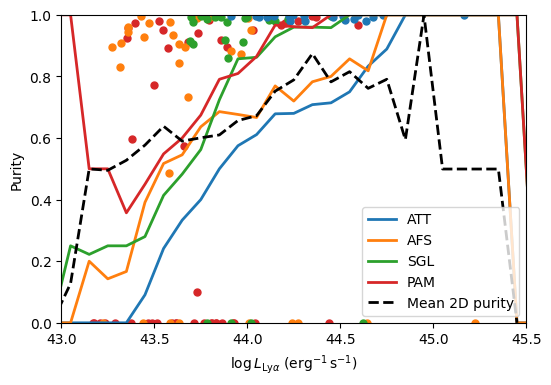

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))


mask = (L_Arr > 0) & last_sel_mask & (score > 0)

puri2d_h, pc = smooth_hist(L_Arr[mask], 42.5, 46, 0.1, 0.5,
                           weights=puri2d[mask])
L_Arr_h, pc = smooth_hist(L_Arr[mask], 42.5, 46, 0.1, 0.5)

mean_puri2d = puri2d_h / L_Arr_h

for iii, c in enumerate(colors_list):
    this_mask = (np.round(score) == iii) & mask
    ax.plot(L_Arr[this_mask], puri2d[this_mask], ls='', marker='o',
            markerfacecolor=c, markeredgecolor=c, markersize=5)

for kkk, score_i in enumerate(score_list):
    good_hist, pc = smooth_hist(L_Arr[(score_i > 3) & mask], 42.5, 46, 0.1, 0.5)
    bad_hist, pc = smooth_hist(L_Arr[(score_i < 3) & mask], 42.5, 46, 0.1, 0.5)

    puri_Arr = good_hist / (good_hist + bad_hist)
    puri_err_Arr = (good_hist / (good_hist + bad_hist) ** 2 +
                    good_hist ** 2 / (good_hist + bad_hist) ** 4 * good_hist) ** 0.5
    puri_err_Arr[~np.isfinite(puri_err_Arr)] = 0
    puri_Arr[~np.isfinite(puri_Arr)] = 0.
    ax.plot(pc, puri_Arr, linewidth=2, label=score_label_list[kkk], c=f'C{kkk}')

ax.plot(pc, mean_puri2d, linewidth=2, c='k', ls='--', label='Mean 2D purity')

ax.set_ylim(0, 1)
ax.set_xlim(43, 45.5)
ax.set_xlabel(r'$\log L_{\mathrm{Ly}\alpha}$ (erg$^{-1}\,$s$^{-1}$)')
ax.set_ylabel('Purity')
ax.legend()

plt.show()

In [7]:
from load_jpas_catalogs import load_minijpas_jnep

pm_flx, pm_err, x_im, y_im, tid_Arr, number, starprob, spCl,\
        photoz, photoz_chi_best, photoz_odds, ra, dec = load_minijpas_jnep(selection=True)

pz = photoz[src_list]
odds = photoz_odds[src_list]
chi_best = photoz_chi_best[src_list]
sp = starprob[src_list]

/tmp/ipykernel_515551/1668342948.py:13: RuntimeWarning: invalid value encountered in divide
  ax.plot(bc, good_before / all_before, ls='--')
/tmp/ipykernel_515551/1668342948.py:14: RuntimeWarning: invalid value encountered in divide
  ax.plot(bc, good_after / all_after)


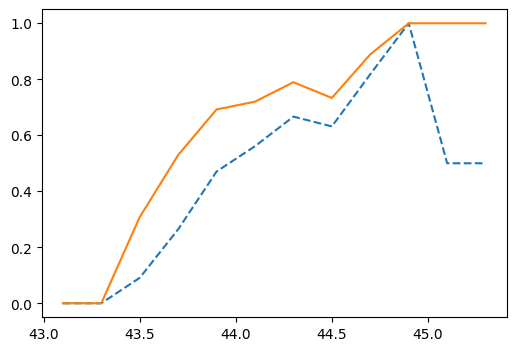

In [8]:
# Mean puri2D after and before removing p < 0.2
mask = (L_Arr > 0) & last_sel_mask & (score > 0)

good_before, bc = smooth_hist(L_Arr[mask & (score > 3)], 42, 46, 0.2, 0.5)
all_before, _ = smooth_hist(L_Arr[mask], 42, 46, 0.2, 0.5)

w_mask = (sp > 0.9) & (puri2d > 0.2)
good_after, _ = smooth_hist(L_Arr[mask & (score > 3) & w_mask], 42, 46, 0.2, 0.5)
all_after, _ = smooth_hist(L_Arr[mask & w_mask], 42, 46, 0.2, 0.5)

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(bc, good_before / all_before, ls='--')
ax.plot(bc, good_after / all_after)

plt.show()

In [9]:
sum((sp[mask] < 0.1))

29

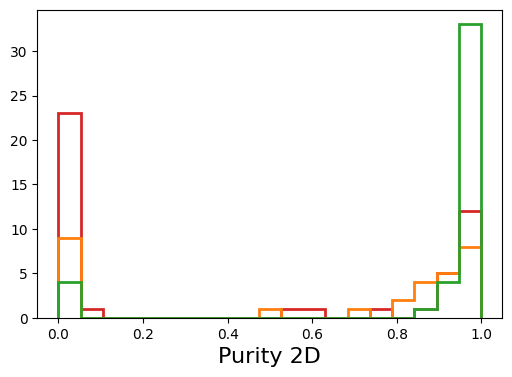

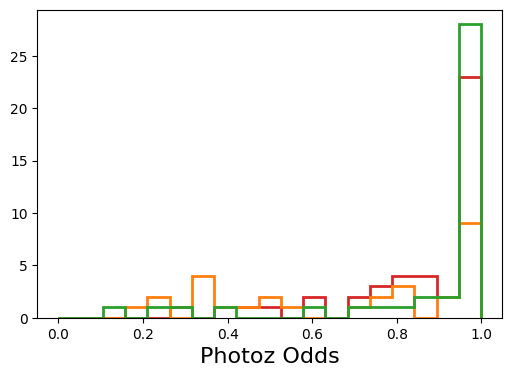

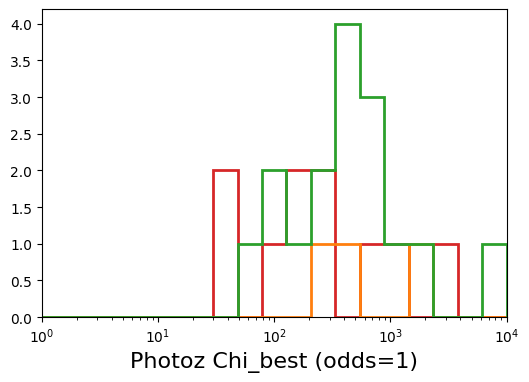

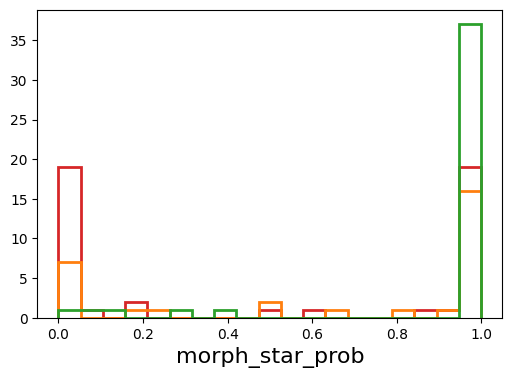

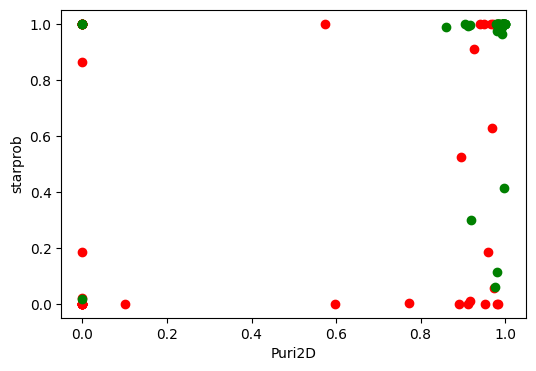

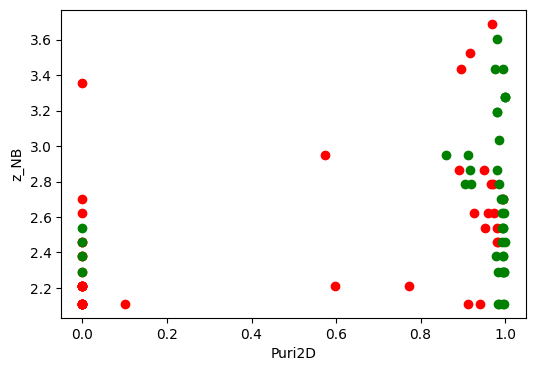

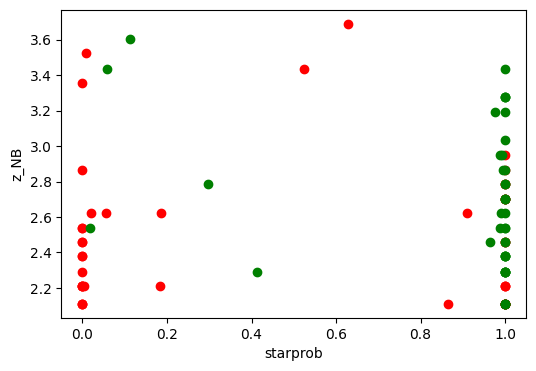

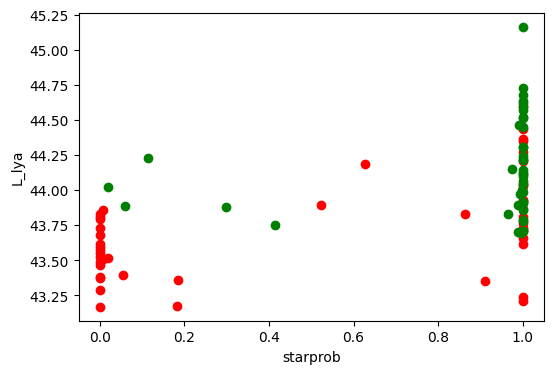

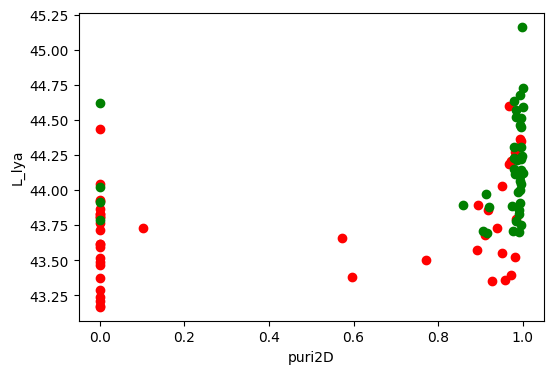

In [10]:
def show_hist(data_arr, bins, xlim=None, ylim=None,
              xlabel='', ylabel='', extra_mask=None,
              logx=False):
    # Define the extra mask
    if extra_mask is None:
        extra_mask = np.ones_like(data_arr).astype(bool)
    
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # score = 1, 2 : Bad candidates
    this_mask = (np.round(score) <= 2) & mask & extra_mask
    ax.hist(data_arr[this_mask], bins, histtype='step',
            lw=2, color='tab:red')
    # score = 3 : idk candidates
    this_mask = (np.round(score) == 3) & mask & extra_mask
    ax.hist(data_arr[this_mask], bins, histtype='step',
            lw=2, color='tab:orange')
    # score = 4 : Good candidates
    this_mask = (np.round(score) > 3) & mask & extra_mask
    ax.hist(data_arr[this_mask], bins, histtype='step',
            lw=2, color='tab:green')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    if logx:
        ax.set_xscale('log')
    
    plt.show()
    
show_hist(puri2d, np.linspace(0, 1, 20), xlabel='Purity 2D')
show_hist(odds, np.linspace(0, 1, 20), xlabel='Photoz Odds')
show_hist(chi_best, np.logspace(0, 4, 20), xlabel='Photoz Chi_best (odds=1)',
          extra_mask=(odds==1), logx=True, xlim=(1, 1e4))
show_hist(sp, np.linspace(0, 1, 20), xlabel='morph_star_prob')

fig, ax = plt.subplots(figsize=(6, 4))

this_mask = (np.round(score) <= 2) & mask
ax.scatter(puri2d[this_mask], sp[this_mask], c='r')
this_mask = (np.round(score) > 3) & mask
ax.scatter(puri2d[this_mask], sp[this_mask], c='g')

ax.set_ylabel('starprob')
ax.set_xlabel('Puri2D')

plt.show()

fig, ax = plt.subplots(figsize=(6, 4))

this_mask = (np.round(score) <= 2) & mask
ax.scatter(puri2d[this_mask], z_Arr[this_mask], c='r')
this_mask = (np.round(score) > 3) & mask
ax.scatter(puri2d[this_mask], z_Arr[this_mask], c='g')

ax.set_ylabel('z_NB')
ax.set_xlabel('Puri2D')

plt.show()

fig, ax = plt.subplots(figsize=(6, 4))

this_mask = (np.round(score) <= 2) & mask
ax.scatter(sp[this_mask], z_Arr[this_mask], c='r')
this_mask = (np.round(score) > 3) & mask
ax.scatter(sp[this_mask], z_Arr[this_mask], c='g')

ax.set_ylabel('z_NB')
ax.set_xlabel('starprob')

plt.show()

fig, ax = plt.subplots(figsize=(6, 4))

this_mask = (np.round(score) <= 2) & mask
ax.scatter(sp[this_mask], L_Arr[this_mask], c='r')
this_mask = (np.round(score) > 3) & mask
ax.scatter(sp[this_mask], L_Arr[this_mask], c='g')

ax.set_ylabel('L_lya')
ax.set_xlabel('starprob')

plt.show()

fig, ax = plt.subplots(figsize=(6, 4))

this_mask = (np.round(score) <= 2) & mask
ax.scatter(puri2d[this_mask], L_Arr[this_mask], c='r')
this_mask = (np.round(score) > 3) & mask
ax.scatter(puri2d[this_mask], L_Arr[this_mask], c='g')

ax.set_ylabel('L_lya')
ax.set_xlabel('puri2D')

plt.show()

165


/tmp/ipykernel_515551/742231934.py:16: RuntimeWarning: invalid value encountered in divide
  axx.plot(bins_c, good_h / (good_h + bad_h), c='k')


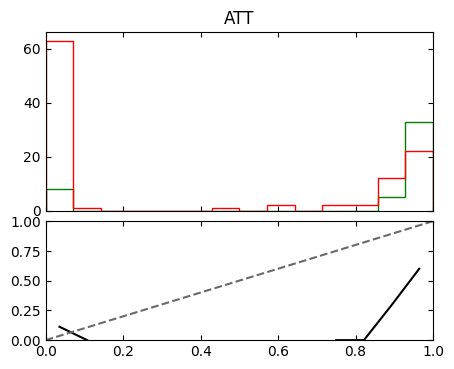

165


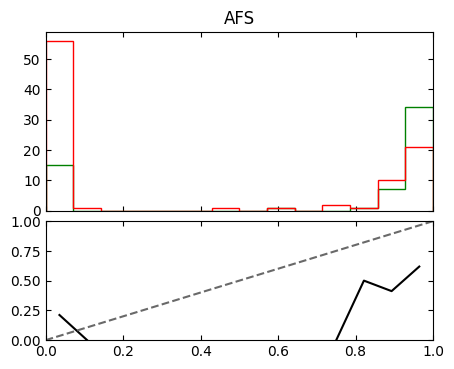

165


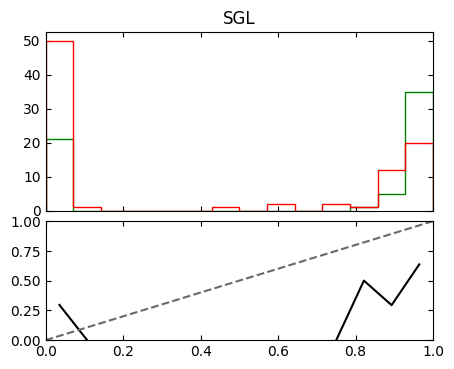

165


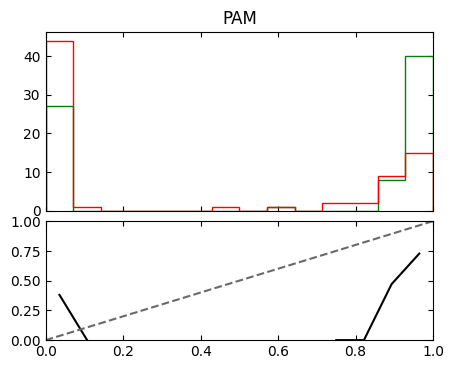

In [11]:
for iii, score_i in enumerate(score_list):
    fig, (ax, axx) = plt.subplots(2, figsize=(5, 4), sharex=True,
                                gridspec_kw=dict(height_ratios=[1.5, 1]))

    mask = nb_Arr < 20
    print(mask.sum())

    bins = np.linspace(0, 1, 15)
    bins_c = [bins[i : i + 2].sum() * 0.5 for i in range(len(bins) - 1)]

    good_h, _ = ax.hist(puri2d[(score_i > 3) & mask], bins,
                        histtype='step', color='green')[:2]
    bad_h, _ = ax.hist(puri2d[(score_i <= 3) & (score_i > 0) & (L_Arr > 0) & mask],
                        bins, histtype='step', color='red')[:2]

    axx.plot(bins_c, good_h / (good_h + bad_h), c='k')
    axx.plot([0, 1], [0, 1], ls='--', c='dimgray')
    axx.set_ylim(0, 1)
    axx.set_xlim(0, 1)
    ax.set_title(score_label_list[iii])

    for axi in [ax, axx]:
        axi.tick_params(which='both', direction='in')
        axi.yaxis.set_ticks_position('both')
        axi.xaxis.set_ticks_position('both')

    fig.subplots_adjust(hspace=0.07)
    plt.show()

64


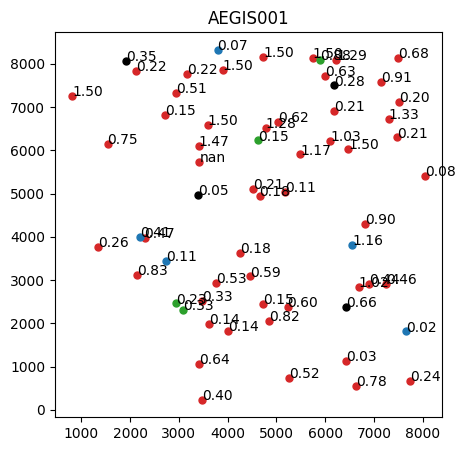

32


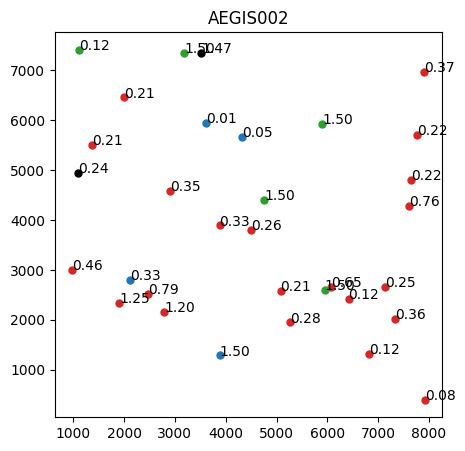

32


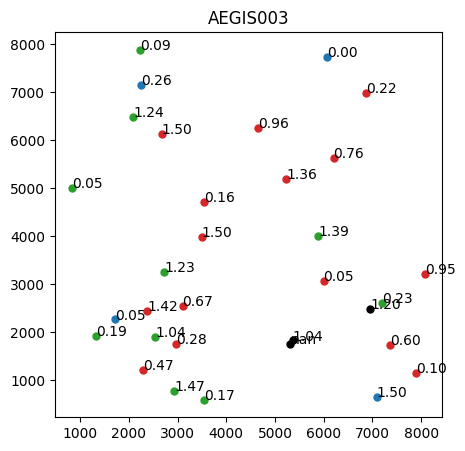

21


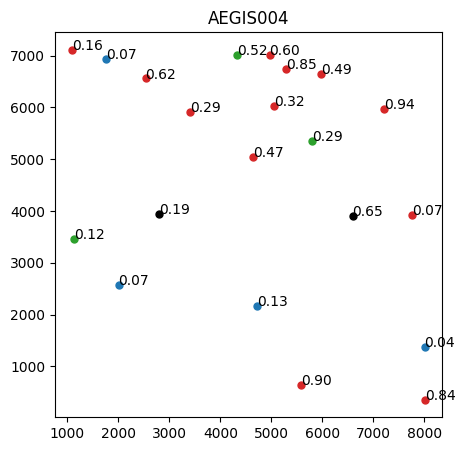

41


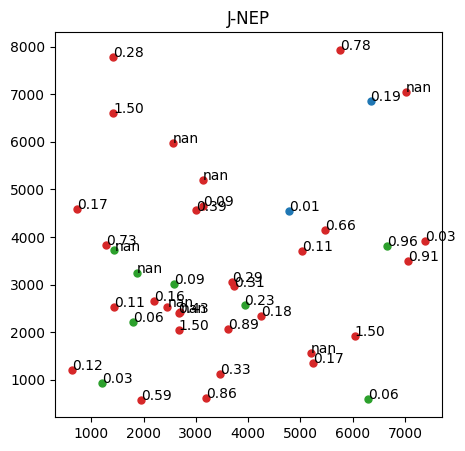

In [12]:
tile_ids = [2241, 2243, 2406, 2470, 2520]
tile_names = [f'AEGIS00{i}' for i in range(1, 5)] + ['J-NEP']
colors_list = ['black', 'tab:red', 'tab:red', 'tab:red', 'tab:green', 'tab:blue']

# score = score_att

for tid, name in zip(tile_ids, tile_names):
    fig, ax = plt.subplots(figsize=(5, 5))

    print(sum(tile_id == tid))
    for iii, c in enumerate(colors_list):
        this_mask = (np.round(score) == iii) & (tile_id == tid) & (mag < 24)
        ax.plot(xim[this_mask], yim[this_mask], ls='', marker='o',
                markerfacecolor=c, markeredgecolor=c, markersize=5)
        
        texts = [f'{s:0.2f}' for s in pz[this_mask]]
        for xim_i, yim_i, pz_i in zip(xim[this_mask], yim[this_mask], texts):
            ax.text(xim_i, yim_i, pz_i)
        ax.set_title(name)

    plt.show()

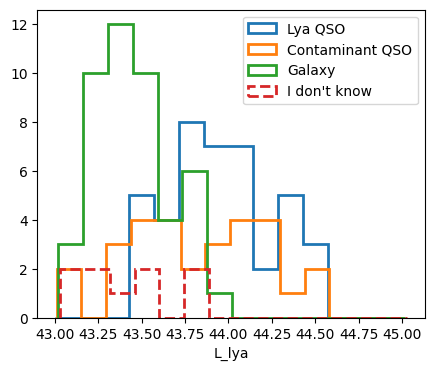

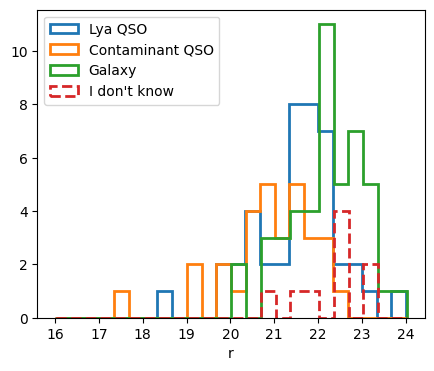

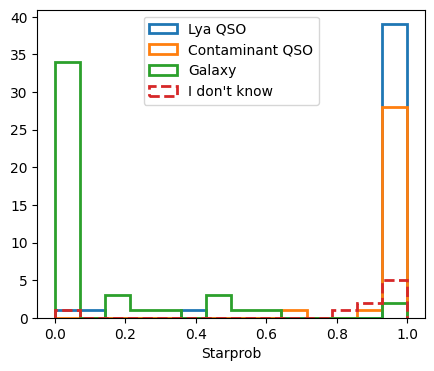

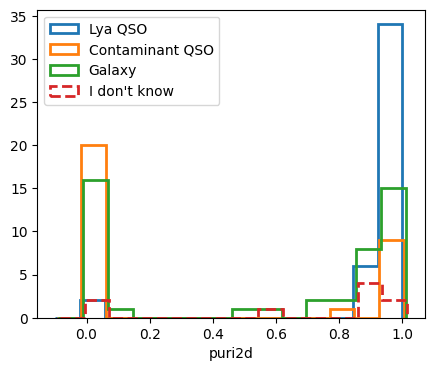

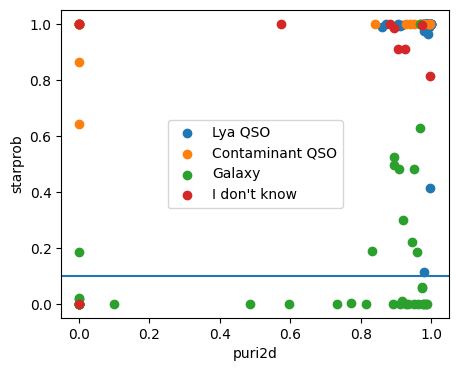

In [13]:
df = pd.read_csv('/home/alberto/almacen/Selected_LAEs/First_visual_sel/inspeccion_AT_2.0.csv')
score_att_2 = df.to_numpy()[:, 1].astype(int)
# Rectificaciones
score_att_2[np.array([8, 18, 20, 28, 57, 99])] = 2
score_att_2[103] = 3
# IDK = 25, 36, 40, 45, 58, 78, 87. 101 

score_2_dict = {
    1: 'Lya QSO',
    2: 'Contaminant QSO',
    3: 'Galaxy',
    4: 'I don\'t know'
}

fig, ax = plt.subplots(figsize=(5, 4))

bins = np.linspace(43, 45, 15)

for ii, (sc, lb) in enumerate(score_2_dict.items()):
    ax.hist(selection_last['L_lya'][score_att_2 == sc], bins + ii*0.01, label=lb,
            histtype='step', linewidth=2, linestyle=('--' if sc == 4 else '-'))
ax.legend()
ax.set_xlabel('L_lya')

plt.show()

fig, ax = plt.subplots(figsize=(5, 4))

bins = np.linspace(16, 24, 25)

for ii, (sc, lb) in enumerate(score_2_dict.items()):
    ax.hist(selection_last['r'][score_att_2 == sc], bins + ii*0.01, label=lb,
            histtype='step', linewidth=2, linestyle=('--' if sc == 4 else '-'))
ax.legend()
ax.set_xlabel('r')

plt.show()

fig, ax = plt.subplots(figsize=(5, 4))

bins = np.linspace(0, 1, 15)
for ii, (sc, lb) in enumerate(score_2_dict.items()):
    ax.hist(starprob[selection_last['src']][score_att_2 == sc], bins, label=lb,
            histtype='step', linewidth=2, linestyle=('--' if sc == 4 else '-'))
ax.legend(loc=9)
ax.set_xlabel('Starprob')

plt.show()

fig, ax = plt.subplots(figsize=(5, 4))

bins = np.linspace(-0.1, 1, 15)
for ii, (sc, lb) in enumerate(score_2_dict.items()):
    ax.hist(selection_last['puri'][score_att_2 == sc], bins + 0.005 * ii, label=lb,
            histtype='step', linewidth=2, linestyle=('--' if sc == 4 else '-'))
ax.legend()
ax.set_xlabel('puri2d')

plt.show()

fig, ax = plt.subplots(figsize=(5, 4))

for ii, (sc, lb) in enumerate(score_2_dict.items()):
    ax.scatter(selection_last['puri'][score_att_2 == sc],
               starprob[selection_last['src']][score_att_2 == sc],
               label=lb)
ax.axhline(0.1)
ax.set_xlabel('puri2d')
ax.set_ylabel('starprob')
ax.legend()

plt.show()

In [14]:
sum(starprob[selection_last['src']] > 0.1)

91

In [15]:
print(
    f'QSO LAEs: {sum(score_att_2 == 1)},\n'
    f'QSO Contaminants: {sum(score_att_2 == 2)},\n'
    f'Low-z Galaxies: {sum(score_att_2 == 3)},\n'
    f'I dont\' know: {sum(score_att_2 == 4)}'
)

QSO LAEs: 42,
QSO Contaminants: 30,
Low-z Galaxies: 46,
I dont' know: 9


In [16]:
print('Bad QSOs:')
print(list(np.array(selection_last['src'])[np.where(score_att_2 == 2)]))
print('Bad Gals:')
print(list(np.array(selection_last['src'])[np.where(score_att_2 == 3)]))

print('IDK:')
print(np.where(score_att_2 == 4))

Bad QSOs:
[1390, 7234, 7653, 21880, 22337, 24054, 24488, 26588, 26984, 30432, 31038, 31899, 33067, 48117, 50545, 52341, 53460, 55102, 57416, 62005, 4242, 33873, 34347, 43714, 49249, 49491, 10282, 20919, 24728, 33699]
Bad Gals:
[1086, 2317, 2476, 4522, 7019, 9051, 9593, 11191, 26147, 34796, 37187, 38069, 38979, 44285, 50134, 55215, 8802, 15307, 27370, 35352, 46937, 47979, 48698, 50734, 52912, 53957, 55066, 60555, 2756, 10139, 11271, 11668, 11739, 26445, 29526, 41956, 45349, 48519, 51101, 2626, 36517, 39417, 52940, 23146, 23401, 53205]
IDK:
(array([ 25,  36,  40,  45,  58,  78,  87, 101, 115]),)


In [17]:
cat = pd.read_csv('/home/alberto/Desktop/LAEs_newtargets.csv')
N_candidates = len(cat)
src_Arr = np.zeros(N_candidates).astype(int)
for i in range(N_candidates):
    src_Arr[i] = np.where((cat['NUMBER'][i] == number) & (cat['TILE_ID'][i] == tid_Arr))[0]

print(src_Arr)

for src in src_Arr:
    try:
        print(starprob[selection_last['src']][selection_last['src'] == src][0])
    except:
        print('no')

FileNotFoundError: [Errno 2] No such file or directory: '/home/alberto/Desktop/LAEs_newtargets.csv'

In [ ]:
sum((spCl == 'QSO') & (zsp > 2))